#### This notebook generates data to be used by the P2 manuscript

IT uses the "old" parameterisation before we shift to the $\chi$ one 

In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [82]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict,bilby_priors_dict
import numpy as np 



#Function to create synthetic data
def create_synthetic_data(h,measurement_noise,seed):

    P    = SystemParameters(h=h,σp=None,σm=measurement_noise,seed=seed)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return P,PTA,data

#Fit model to data and return likelihood
def get_likelihood(data,parameter_name,parameter_value,P,PTA,measurement_model):

    _P = copy.copy(P)
    _PTA = copy.copy(PTA)
    _P.measurement_model = measurement_model
    

    #Define the model 
    model = LinearModel(_P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,_PTA)

    #Get the
    guessed_parameters = priors_dict(_PTA,_P) #These are the true parameters 
    guessed_parameters[parameter_name] = np.array([parameter_value])

    
    model_likelihood,x_results,y_results = KF.likelihood(guessed_parameters)

    return model_likelihood

In [83]:
h = 1e-12
measurement_noise = 1e-11
seed=1236
P,PTA,data = create_synthetic_data(h,measurement_noise,seed)

In [93]:
import copy 
import logging 
logger = logging.getLogger().setLevel(logging.ERROR)


#set the measurement model
measurement_model = 'pulsar' #Set the measurement model 
parameter_name = "alpha_gw"
N = 10000
parameter_range = np.logspace(-9,-6,N)
parameter_range = np.linspace(0,np.pi,N)
parameter_range = np.arange(0,3.15,0.0001)


parameter_range = np.arange(0,3.15,0.001)

eps = 0.0000001
parameter_range = np.arange(0.999,1.001,eps)

likelihood_curves_earth_omega = np.zeros(len(parameter_range))             


for i,p in enumerate(parameter_range):
    p = parameter_range[i]
    likelihood_curves_earth_omega[i] = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)


In [95]:

N = len(parameter_range)
outputs = np.zeros((N,2))
outputs[:,0] = parameter_range
outputs[:,1] = likelihood_curves_earth_omega
#np.save("../data/alpha_likelihood_old_method",outputs)
np.save("../data/alpha_likelihood_old_method_local",outputs)

# Appendix 

In [46]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict,bilby_priors_dict
import numpy as np 



#Function to create synthetic data
def create_synthetic_data(h,measurement_noise,seed,omega):

    P    = SystemParameters(h=h,σp=None,σm=measurement_noise,seed=seed,Ω=omega)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return P,PTA,data

#Fit model to data and return likelihood
def get_likelihood(data,parameter_name,parameter_value,P,PTA,measurement_model):

    _P = copy.copy(P)
    _PTA = copy.copy(PTA)
    _P.measurement_model = measurement_model
    

    #Define the model 
    model = LinearModel(_P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,_PTA)

    #Get the
    guessed_parameters = priors_dict(_PTA,_P) #These are the true parameters 
    guessed_parameters[parameter_name] = np.array([parameter_value])

    
    model_likelihood,x_results,y_results = KF.likelihood(guessed_parameters)

    return model_likelihood

In [63]:
h = 1e-12
measurement_noise = 1e-11
seed=1236
omega = 5e-1
P,PTA,data = create_synthetic_data(h,measurement_noise,seed,omega)

In [64]:
import copy 
import logging 
logger = logging.getLogger().setLevel(logging.ERROR)


#set the measurement model
measurement_model = 'pulsar' #Set the measurement model 
parameter_name = "delta_gw"
N = 100

parameter_range = np.linspace(0,np.pi,N)


likelihood_curves_earth_omega = np.zeros(len(parameter_range))             


for i,p in enumerate(parameter_range):
    p = parameter_range[i]
    likelihood_curves_earth_omega[i] = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)


In [65]:
import matplotlib.pyplot as plt 

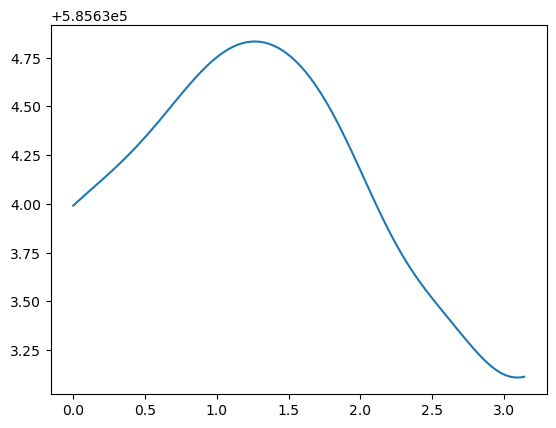

In [66]:
plt.plot(parameter_range,likelihood_curves_earth_omega)